### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ColabNotebooks/')

Mounted at /content/drive


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
missing_counts = data.isnull().sum().sort_values()
print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# *** Check the following with the histogram

# Assuming that any NaN in Carryway means "less than 1" times people have ordered carry away
data['CarryAway'] = data['CarryAway'].fillna("less1")

# Cleaning up the values in Marital Status for easier processing later
data['maritalStatus']= data['maritalStatus'].str.replace('partner', ' ', regex=False)

#Number of times that he/she goes to a coffee house: for NaN assumes as less than 1
data['CoffeeHouse'] = data['CoffeeHouse'].fillna("less1")

#Number of times that he/she eats at a restaurant with average expense less than \$20 per person: It is possible to have 0/never. Assuming never
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna("never")

#Number of times that he/she eats at a restaurant with average expense between \$20 to 50 per person: Assuming less than 1
data['Restaurant20To50'] = data['Restaurant20To50'].fillna("less1")

#Number of times that he/she goes to a bar: Assuming never
data['Bar'] = data['Bar'].fillna("never")

#Number of times that he/she use car: do not drive
data['car'] = data['car'].fillna("do not drive")

data['coupon'].value_counts()

#missing_counts = data.isnull().sum().sort_values()
#print(missing_counts)
#data.info()

,count
coupon,
Coffee House,3996
Restaurant(<20),2786
Carry out & Take away,2393
Bar,2017
Restaurant(20-50),1492


4. What proportion of the total observations chose to accept the coupon?



In [7]:
# prompt: What proportion of the total observations chose to accept the coupon?

acceptance_rate = data['Y'].mean()
print(f"The proportion of observations that accepted the coupon is: {acceptance_rate}")
#data['Y'].value_counts()

The proportion of observations that accepted the coupon is: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

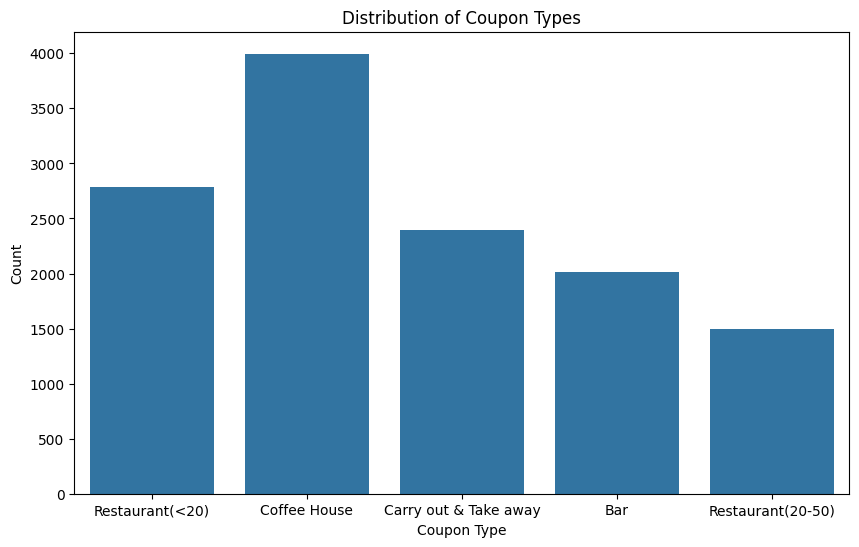

In [8]:
# prompt: Use a bar plot to visualize the coupon column

plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()


6. Use a histogram to visualize the temperature column.

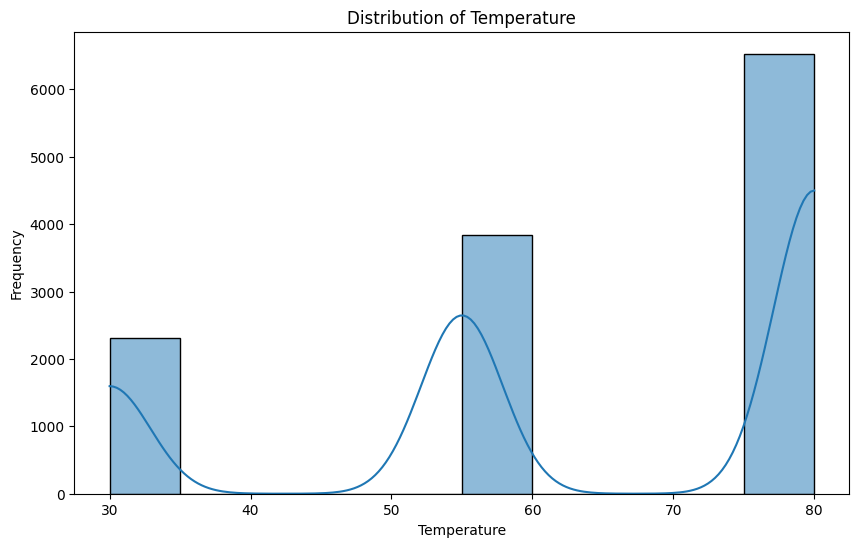

In [9]:
# prompt: Use a histogram to visualize the temperature column

plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
df_bar=' '
df_bar=data.query('coupon == "Bar"')
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried,...,never,less1,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried,...,never,less1,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried,...,never,less1,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [11]:
bar_acceptance_rate = df_bar['Y'].mean()
print(f"The proportion of that accepted the bar coupon is: {bar_acceptance_rate}")

The proportion of that accepted the bar coupon is: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
data.groupby('Bar')['Y'].mean()


,Y
Bar,
1~3,0.621917
4~8,0.637546
gt8,0.575931
less1,0.563756
never,0.532051


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:

# Create a new column indicating whether a driver meets the criteria
data['bar_over_25'] = ((data['Bar'] != 'never') & (data['age'] > "25"))

# Calculate the acceptance rate for drivers who meet the criteria
acceptance_rate_bar_over_25 = data.loc[data['bar_over_25'], 'Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others = data.loc[~data['bar_over_25'], 'Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_bar_over_25}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others}")

# Check for a significant difference (you can use statistical tests for a more rigorous analysis)
if acceptance_rate_bar_over_25 > acceptance_rate_others:
  print("There appears to be a higher acceptance rate for drivers who go to a bar more than once a month and are over 25.")
elif acceptance_rate_bar_over_25 < acceptance_rate_others:
  print("There appears to be a lower acceptance rate for drivers who go to a bar more than once a month and are over 25.")
else:
  print("There does not appear to be a significant difference in acceptance rate between the two groups.")


Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.587603009673952
Acceptance rate for all other drivers: 0.5533652492255703
There appears to be a higher acceptance rate for drivers who go to a bar more than once a month and are over 25.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
#acceptance rate of drivers who go to bars more than once a month and passengers that were not a kid

data['bar_not_kid'] = ((data['Bar'] != 'never') & (data['age'] > '18'))

#acceptance rate of drivers who go to bars more than once a month and occupants other than farming, fishing and forestry
data['bar_not_farming_fishing_forestry'] = ((data['Bar'] != 'never') & (data['occupation'] != 'farming') & (data['occupation'] != 'fishing') & (data['occupation'] != 'forestry'))

acc_rate_bar_not_kid = data.loc[data['bar_not_kid'], 'Y'].mean()
acc_rate_bar_not_farming_fishing_forestry = data.loc[data['bar_not_farming_fishing_forestry'], 'Y'].mean()

#data.head(10)
#data.Bar.value_counts()

#data.Bar.value_counts()


print(f"Acceptance rate of drivers who go to bars more than once a month and passengers that were not a kid : {acc_rate_bar_not_kid}")

print(f"Acceptance rate of drivers who go to bars more than once a month and  occupations other than farming, fishing, or forestry. : {acc_rate_bar_not_farming_fishing_forestry}")





Acceptance rate of drivers who go to bars more than once a month and passengers that were not a kid : 0.5945799457994579
Acceptance rate of drivers who go to bars more than once a month and  occupations other than farming, fishing, or forestry. : 0.5945799457994579


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [55]:
data['bar_not_kid'] = ((data['Bar'] != 'never') & (data['Bar'] != 'less1') & (data['age'] > '18') & (data['maritalStatus'] != 'widowed'))
data['bar_not_kid_un_30'] = ((data['Bar'] != 'never') &  (data['Bar'] != 'less1') & (data['age'] > '30') )
data['income_less_50k'] = data['income'].apply(lambda x: True if x in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'] else False)
data['cheap_resturents_more_than_4'] = data['RestaurantLessThan20'].apply(lambda x: True if x in ['gt8', '4~8'] else False)

data['cheap_and_less_50K'] = ((data['cheap_resturents_more_than_4'] == True)  & (data['income_less_50k'] == True)  )

#data.cheap_resturents_more_than_4.value_counts()
#data.cheap_and_less_50K.value_counts()

acc_rate_bar_not_kid = data.loc[data['bar_not_kid'], 'Y'].mean()
acc_rate_bar_not_kid_un_30 = data.loc[data['bar_not_kid'], 'Y'].mean()
acc_rate_income_less_50k = data.loc[data['cheap_and_less_50K'], 'Y'].mean()


print(f"Acceptance rate of drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed  : {acc_rate_bar_not_kid}")
print(f"Acceptance rate of drivers go to bars more than once a month and are under the age of 30  : {acc_rate_bar_not_kid_un_30 }")
print(f"Acceptance rate of drivers go to cheap restaurants more than 4 times a month and income is less than 50K.: {acc_rate_income_less_50k}")

#income is less than 50K.

#data.income.value_counts()
#data.head(10)

Acceptance rate of drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed  : 0.6221139045664443
Acceptance rate of drivers go to bars more than once a month and are under the age of 30  : 0.6221139045664443
Acceptance rate of drivers go to cheap restaurants more than 4 times a month and income is less than 50K.: 0.6007020623080298


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# prompt: income is lBased on these observations, what do you hypothesize about drivers who accepted the bar coupons?ess than 50K.

# Based on the observations, we can hypothesize that drivers who accepted the bar coupons:

# 1. Are more likely to frequent bars: Those who go to bars more frequently (more than once a month)
#    tend to have a higher acceptance rate for bar coupons.
# 2. Are more likely to be older and have a certain occupation
#    (e.g., not farming, fishing, or forestry): Acceptance rate was higher in drivers who go to a bar more than once a month and are over 25
# 3. May have different passenger criteria

# In summary:
# Drivers who accept bar coupons are more likely to be regular bar-goers,
# and certain passenger types may also influence acceptance.

# Further analysis can be conducted to explore other potential factors
# that influence coupon acceptance. This could involve creating new variables or
# utilizing machine learning techniques to determine the most crucial factors
# associated with bar coupon acceptance.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [59]:
# prompt: Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

# Let's explore the "Restaurant(<20)" coupon group

# 1. Create a new DataFrame that contains just the Restaurant(<20) coupons.
df_restaurant_lt20 = data.query('coupon == "Restaurant(<20)"')

# 2. What proportion of Restaurant(<20) coupons were accepted?
restaurant_lt20_acceptance_rate = df_restaurant_lt20['Y'].mean()
print(f"The proportion of that accepted the Restaurant(<20) coupon is: {restaurant_lt20_acceptance_rate}")

# 3. Compare the acceptance rate between those who eat at cheap restaurants 3 or fewer times a month to those who go more.
data.groupby('RestaurantLessThan20')['Y'].mean()

# 4. Compare the acceptance rate between drivers who go to cheap restaurants more than once a month and are over the age of 30 to the all others.  Is there a difference?
data['restaurant_lt20_over_30'] = ((data['RestaurantLessThan20'] != 'never') & (data['age'] > "30"))

# Calculate the acceptance rate for drivers who meet the criteria
acceptance_rate_restaurant_lt20_over_30 = data.loc[data['restaurant_lt20_over_30'], 'Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others_restaurant = data.loc[~data['restaurant_lt20_over_30'], 'Y'].mean()

print(f"Acceptance rate for drivers who go to cheap restaurants more than once a month and are over 30: {acceptance_rate_restaurant_lt20_over_30}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others_restaurant}")


# 5. Use the same process to compare the acceptance rate between drivers who go to cheap restaurants more than once a month and had passengers that were a kid.
data['restaurant_lt20_with_kid'] = ((data['RestaurantLessThan20'] != 'never') & (data['age'] < "18"))

# Calculate the acceptance rate for drivers who meet the criteria
acceptance_rate_restaurant_lt20_with_kid = data.loc[data['restaurant_lt20_with_kid'], 'Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others_restaurant_with_kid = data.loc[~data['restaurant_lt20_with_kid'], 'Y'].mean()

print(f"Acceptance rate for drivers who go to cheap restaurants more than once a month and have kids: {acceptance_rate_restaurant_lt20_with_kid}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others_restaurant_with_kid}")



# 6. Compare the acceptance rates between those drivers who:
#
# - go to cheap restaurants more than once a month, had passengers that were not a kid, and were not widowed *OR*
# - go to cheap restaurants more than once a month and are under the age of 30 *OR*
# - go to bars more than 4 times a month and income is less than 50K.

# You can continue exploring other aspects like the impact of weather, time of day, etc., on the acceptance rate of Restaurant(<20) coupons.

# 7. Based on these observations, what do you hypothesize about drivers who accepted the Restaurant(<20) coupons?
#  - Drivers who frequently visit cheap restaurants are more likely to accept Restaurant(<20) coupons.
#  - Drivers over 30 might be slightly more likely to accept these coupons than younger drivers.
#  - The presence of children in the car might not have a significant impact on coupon acceptance.

# You can further analyze and refine your hypotheses based on the results obtained from your analysis.


The proportion of that accepted the Restaurant(<20) coupon is: 0.7071069633883704
Acceptance rate for drivers who go to cheap restaurants more than once a month and are over 30: 0.5487971569163478
Acceptance rate for all other drivers: 0.595193740685544
Acceptance rate for drivers who go to cheap restaurants more than once a month and have kids: nan
Acceptance rate for all other drivers: 0.5684326710816777
